#
# import required libraries

In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
#print(stopwords.words('english'))
import numpy as np
import re
#from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
from preprocessor import clean

In [2]:
def percentage(part,whole):
     return 100 * float(part)/float(whole)

    
stop_words = set(stopwords.words('english'))
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_words]
    temp = " ".join(temp)
    return temp

In [3]:
def shorten_tweets(tweet):
    temp = tweet[0:100]
    return temp
        

In [4]:
#query = "2021 was a year -is:retweet"
QUERY ="2021 (was OR is )(sad OR terrible) -is:retweet"

# first batch of tweets

In [5]:
#Sentiment Analysis
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
tweet_id = []
neutral_list = []
negative_list = []
positive_list = []

In [6]:
client = tweepy.Client(bearer_token =bearerToken)

In [7]:
for tweet in tweepy.Paginator(client.search_recent_tweets,query = QUERY, max_results = 100).flatten(limit = 20000):
    #print(tweet.text)
    tweet_id.append(tweet.id)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

In [8]:
tweet_list = pd.DataFrame(tweet_list)
tweet_id = pd.DataFrame(tweet_id)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  9219
positive number:  3650
negative number:  5434
neutral number:  135


In [9]:
#len(neutral_list) / len(tweet_list)
positive = 100 * (len(positive_list) / len(tweet_list))
negative  = 100 * (len(negative_list) / len(tweet_list))
neutral = 100 * (len(neutral_list) / len(tweet_list))

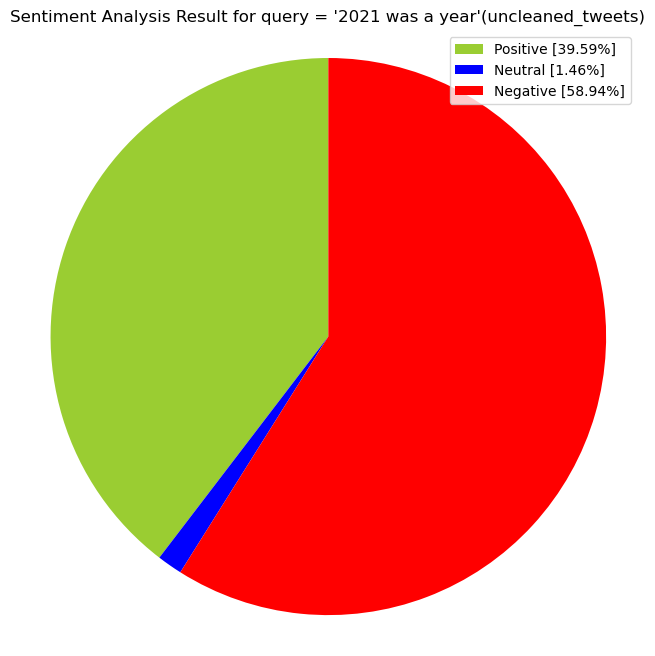

In [13]:
#Creating PieCart
plt.figure(figsize=(8, 8))
labels = ['Positive ['+str(round(positive,2))+'%]' , 'Neutral ['+str(round(neutral,2))+'%]','Negative ['+str(round(negative,2))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for query = '2021 was a year'(uncleaned_tweets)")
plt.axis('equal')
plt.show()

In [14]:
tweet_list.sample(10)

,0
6462,Nothing is more sad than the death of an illus...
2410,"As sad as it ended, 2021 brought the opportuni..."
3717,@EllenBarkin Omg this is perfect. Hilarious an...
5041,2021 was a mix of sad and happy moments for me...
3382,@cher 😭 I don't cry easily at sad things. Hard...
1170,"Hey, Facebook, I Made a Metaverse 27 Years Ago..."
6324,"2021 was filled with ups and downs, sad and ha..."
202,"As sad as it is hearing about Betty White, it’..."
4208,I’m sad right now to start the last day of 202...
76,i am incredibly sad how bad my trust issues ha...


In [15]:
tweet_list.rename(columns = {0:'unclean_tweets'},inplace = True)


In [24]:
tweet_list

,unclean_tweets
0,@OctoSquid_503 I put about 50-60 hours into th...
1,A story about why 2021 was great and not terri...
2,The jaedo event I bought tickets for in the 2n...
3,this year is going to be super dynamic for me ...
4,2021 literally such a tough year 😭 none of the...
...,...
9214,"So so sad. C.R.A.Z.Y, Dallas Buyers Club, Big ..."
9215,Very sad. Sharp Objects is the best-directed H...
9216,I don't how I feel about 2021. I think it was ...
9217,Watching NCT 2021 content without the boistero...


In [25]:
tweet_id.rename(columns = {0:'tweet_id'},inplace = True)
tweet_id_and_list = pd.concat([tweet_id, tweet_list], axis=1, join='inner')

In [26]:
tweet_id_and_list

,tweet_id,unclean_tweets
0,1477985792605757447,@OctoSquid_503 I put about 50-60 hours into th...
1,1477984041248989187,A story about why 2021 was great and not terri...
2,1477983892665688069,The jaedo event I bought tickets for in the 2n...
3,1477981564323569664,this year is going to be super dynamic for me ...
4,1477981357535944707,2021 literally such a tough year 😭 none of the...
...,...,...
9214,1475453343401226242,"So so sad. C.R.A.Z.Y, Dallas Buyers Club, Big ..."
9215,1475453196030128131,Very sad. Sharp Objects is the best-directed H...
9216,1475452646697975815,I don't how I feel about 2021. I think it was ...
9217,1475452427398643715,Watching NCT 2021 content without the boistero...


In [27]:
tweet_id_and_list.drop_duplicates(inplace = True)

In [28]:
tweet_id_and_list

,tweet_id,unclean_tweets
0,1477985792605757447,@OctoSquid_503 I put about 50-60 hours into th...
1,1477984041248989187,A story about why 2021 was great and not terri...
2,1477983892665688069,The jaedo event I bought tickets for in the 2n...
3,1477981564323569664,this year is going to be super dynamic for me ...
4,1477981357535944707,2021 literally such a tough year 😭 none of the...
...,...,...
9214,1475453343401226242,"So so sad. C.R.A.Z.Y, Dallas Buyers Club, Big ..."
9215,1475453196030128131,Very sad. Sharp Objects is the best-directed H...
9216,1475452646697975815,I don't how I feel about 2021. I think it was ...
9217,1475452427398643715,Watching NCT 2021 content without the boistero...


In [29]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
ID_TWEET = pd.DataFrame(tweet_id_and_list)
ID_TWEET['clean_tweets'] = ID_TWEET['unclean_tweets']
#Removing RT, Punctuation etc
ID_TWEET['clean_tweets'] = ID_TWEET['clean_tweets'].apply(clean_tweet)
ID_TWEET['clean_tweets'] = ID_TWEET['clean_tweets'].apply(clean)
ID_TWEET['first100charactersoftweets'] =ID_TWEET['clean_tweets'].apply(shorten_tweets)
ID_TWEET = ID_TWEET.drop_duplicates(subset='first100charactersoftweets', keep="first")
ID_TWEET.head(10)


C:\Users\Olazaah\Anaconda3\envs\tensorlow1\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


,tweet_id,unclean_tweets,clean_tweets,first100charactersoftweets
0,1477985792605757447,@OctoSquid_503 I put about 50-60 hours into th...,put hours game last year still holds well blas...,put hours game last year still holds well blas...
1,1477984041248989187,A story about why 2021 was great and not terri...,story great terrible,story great terrible
2,1477983892665688069,The jaedo event I bought tickets for in the 2n...,jaedo event bought tickets nd quarter finally ...,jaedo event bought tickets nd quarter finally ...
3,1477981564323569664,this year is going to be super dynamic for me ...,year going super dynamic bc im graduating uni ...,year going super dynamic bc im graduating uni ...
4,1477981357535944707,2021 literally such a tough year 😭 none of the...,literally tough year none plan going right pre...,literally tough year none plan going right pre...
5,1477979403200045057,The Red Sleeve is one of the best drama for 20...,red sleeve one best drama walaupun sad ending,red sleeve one best drama walaupun sad ending
6,1477978546786258949,@j_g_allen Making the school building a vax si...,making school building vax site terrible advic...,making school building vax site terrible advic...
7,1477975054004600834,"sad, IPSB is no longer active since the middle...",sad ipsb longer active since middle probably w...,sad ipsb longer active since middle probably w...
8,1477973141196521472,@nilepostnews The RDC writer says; Museveni is...,rdc writer says museveni hero led country thru...,rdc writer says museveni hero led country thru...
9,1477972464152031235,@HesterJamieson @Mimithe20536023 @RedPlanetTV ...,sad many new accounts made may renewal falsely...,sad many new accounts made may renewal falsely...


In [39]:
first_batch = ID_TWEET

In [40]:
ID_TWEET.unclean_tweets[1]

'A story about why 2021 was great and not terrible ❤️ https://t.co/ZVKnengcij'

In [55]:
len(first_batch)

8745

### Second batch of tweets


In [56]:
#Sentiment Analysis
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
tweet_id = []
neutral_list = []
negative_list = []
positive_list = []
QUERY ="2021 was a year -is:retweet"
client = tweepy.Client(bearer_token =bearerToken)
for tweet in tweepy.Paginator(client.search_recent_tweets,query = QUERY, max_results = 100).flatten(limit = 10000):
    #print(tweet.text)
    tweet_id.append(tweet.id)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

        
tweet_list = pd.DataFrame(tweet_list)
tweet_id = pd.DataFrame(tweet_id)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  10000
positive number:  7111
negative number:  1938
neutral number:  951


In [57]:
#len(neutral_list) / len(tweet_list)

positive = 100 * (len(positive_list) / len(tweet_list))
negative  = 100 * (len(negative_list) / len(tweet_list))
neutral = 100 * (len(neutral_list) / len(tweet_list))

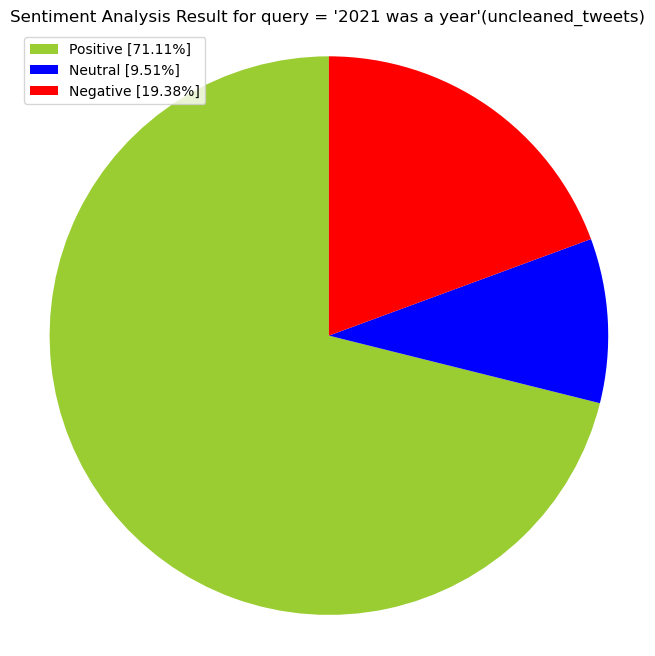

In [58]:
#Creating PieCart
plt.figure(figsize=(8, 8))
labels = ['Positive ['+str(round(positive,2))+'%]' , 'Neutral ['+str(round(neutral,2))+'%]','Negative ['+str(round(negative,2))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for query = '2021 was a year'(uncleaned_tweets)")
plt.axis('equal')
plt.show()

In [59]:
tweet_list.rename(columns = {0:'unclean_tweets'},inplace = True)
tweet_id.rename(columns = {0:'tweet_id'},inplace = True)
tweet_id_and_list = pd.concat([tweet_id, tweet_list], axis=1, join='inner')
tweet_id_and_list.drop_duplicates(inplace = True)

In [60]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
ID_TWEET = pd.DataFrame(tweet_id_and_list)
ID_TWEET['clean_tweets'] = ID_TWEET['unclean_tweets']
#Removing RT, Punctuation etc
ID_TWEET['clean_tweets'] = ID_TWEET['clean_tweets'].apply(clean_tweet)
ID_TWEET['clean_tweets'] = ID_TWEET['clean_tweets'].apply(clean)
ID_TWEET['first100charactersoftweets'] =ID_TWEET['clean_tweets'].apply(shorten_tweets)
ID_TWEET = ID_TWEET.drop_duplicates(subset='first100charactersoftweets', keep="first")
ID_TWEET.head(10)


C:\Users\Olazaah\Anaconda3\envs\tensorlow1\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


,tweet_id,unclean_tweets,clean_tweets,first100charactersoftweets
0,1478000852195581954,PSA: this tweet was not for a flight on which ...,psa tweet flight booked flown anywhere since m...,psa tweet flight booked flown anywhere since m...
1,1478000764488458246,"Besides your bias, who in 2021 wrecked you the...",besides bias wrecked jjk without doubt year,besides bias wrecked jjk without doubt year
2,1478000625438781440,"🎂 On January 3, 2009, the first #Bitcoin block...",january first block mined interesting read yea...,january first block mined interesting read yea...
3,1478000525660631047,Reading was a big part of my recovery in 2021....,reading big part recovery went reading couple ...,reading big part recovery went reading couple ...
4,1478000449269780480,"If 2020 was a year of upheaval, and 2021 a yea...",year upheaval year adjustment promises year tr...,year upheaval year adjustment promises year tr...
5,1478000428079931392,2021 being a tough year ended up with a great ...,tough year ended great success thanks god winn...,tough year ended great success thanks god winn...
6,1478000377261875204,@mt33_rand @FAB1150 @damhack @DigiEconomist It...,likely renewables year probably even times bac...,likely renewables year probably even times bac...
7,1478000251894071297,2021 was the 1st full year as the Supervising ...,st full year supervising editor taking respons...,st full year supervising editor taking respons...
8,1478000232327745536,2021 was a breakout year for MulitplAI. Thanks...,breakout year mulitplai thanks supported us jo...,breakout year mulitplai thanks supported us jo...
9,1478000159774715908,@YIELDapp came a long way already! 2021 was a ...,came long way already great year excited see b...,came long way already great year excited see b...


In [61]:
len(ID_TWEET)

9136


#
# Combined batches

In [62]:
frames = [first_batch,ID_TWEET]
combined = pd.concat(frames)
display(combined)

,tweet_id,unclean_tweets,clean_tweets,first100charactersoftweets
0,1477985792605757447,@OctoSquid_503 I put about 50-60 hours into th...,put hours game last year still holds well blas...,put hours game last year still holds well blas...
1,1477984041248989187,A story about why 2021 was great and not terri...,story great terrible,story great terrible
2,1477983892665688069,The jaedo event I bought tickets for in the 2n...,jaedo event bought tickets nd quarter finally ...,jaedo event bought tickets nd quarter finally ...
3,1477981564323569664,this year is going to be super dynamic for me ...,year going super dynamic bc im graduating uni ...,year going super dynamic bc im graduating uni ...
4,1477981357535944707,2021 literally such a tough year 😭 none of the...,literally tough year none plan going right pre...,literally tough year none plan going right pre...
...,...,...,...,...
9995,1477400508533022722,2021 really was a rough one for my mental heal...,really rough one mental health truly feel many...,really rough one mental health truly feel many...
9996,1477400502757257217,Happy new year to everyone except the boy I da...,happy new year everyone except boy dated coupl...,happy new year everyone except boy dated coupl...
9997,1477400502564499464,"2021 was so crazy I bought a car, moved out , ...",crazy bought car moved shot porn butt plug bum...,crazy bought car moved shot porn butt plug bum...
9998,1477400427259994114,"I think 2021 was a descent art year, despite n...",think descent art year despite able use tablet...,think descent art year despite able use tablet...


# 
# check for duplicates and drop if there are duplicates

In [63]:
New_combined = combined.drop_duplicates(subset='first100charactersoftweets', keep="first")
len(New_combined)

17774

In [64]:
ID_TWEET = New_combined

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
ID_TWEET[['polarity', 'subjectivity']] = ID_TWEET['clean_tweets'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in ID_TWEET['clean_tweets'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        ID_TWEET.loc[index, 'sentiment'] = 'negative'
        ID_TWEET.loc[index, 'neg'] = neg
        ID_TWEET.loc[index, 'neu'] = neu
        ID_TWEET.loc[index, 'pos'] = pos
        ID_TWEET.loc[index, 'compound'] = comp
    elif pos > neg:
        ID_TWEET.loc[index, 'sentiment'] = 'positive'
        ID_TWEET.loc[index, 'neg'] = neg
        ID_TWEET.loc[index, 'neu'] = neu
        ID_TWEET.loc[index, 'pos'] = pos
        ID_TWEET.loc[index, 'compound'] = comp
    else:
        ID_TWEET.loc[index, 'sentiment'] = 'neutral'
        ID_TWEET.loc[index, 'neg'] = neg
        ID_TWEET.loc[index, 'neu'] = neu
        ID_TWEET.loc[index, 'pos'] = pos
        ID_TWEET.loc[index, 'compound'] = comp

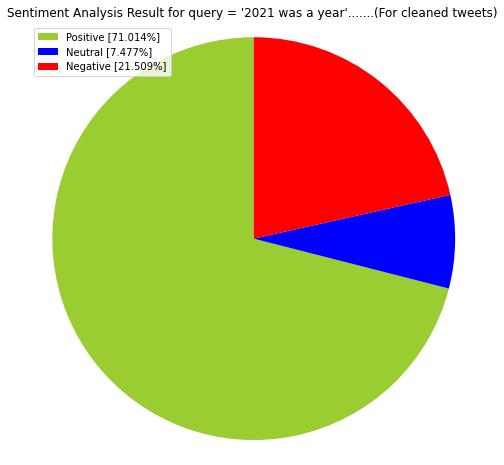

In [4]:
#len(neutral_list) / len(tweet_list)
positive = round(100 * (ID_TWEET.sentiment.value_counts()['positive'] / len(ID_TWEET)),3)
negative  = round(100 * (ID_TWEET.sentiment.value_counts()['negative'] / len(ID_TWEET)),3)
neutral = round(100 * (ID_TWEET.sentiment.value_counts()['neutral'] / len(ID_TWEET)),3)

#Creating PieCart
plt.figure(figsize=(8, 8))
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for query = '2021 was a year'.......(For cleaned tweets)")
plt.axis('equal')
plt.show()

In [79]:
ID_TWEET.unclean_tweets[4].tolist()

["2021 literally such a tough year 😭 none of the plan was going right, pretty sad but should make another plan to stay sober🍻\nHope 2022's plan is rolling to the right way",
 "If 2020 was a year of upheaval, and 2021 a year of adjustment, then 2022 promises to be the year of transformation. \n\nHere's a look at six IT trends that will reshape organizations in the coming year:\nhttps://t.co/AOzAh3g7dZ https://t.co/Q9EN6NEwIZ"]

In [81]:
ID_TWEET

,tweet_id,unclean_tweets,clean_tweets,first100charactersoftweets,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,1477985792605757447,@OctoSquid_503 I put about 50-60 hours into th...,put hours game last year still holds well blas...,put hours game last year still holds well blas...,-0.047619,0.545238,positive,0.000,0.815,0.185,0.6124
1,1477984041248989187,A story about why 2021 was great and not terri...,story great terrible,story great terrible,-0.100000,0.875000,positive,0.165,0.588,0.248,0.1803
2,1477983892665688069,The jaedo event I bought tickets for in the 2n...,jaedo event bought tickets nd quarter finally ...,jaedo event bought tickets nd quarter finally ...,-0.333333,1.000000,negative,0.230,0.556,0.214,-0.0516
3,1477981564323569664,this year is going to be super dynamic for me ...,year going super dynamic bc im graduating uni ...,year going super dynamic bc im graduating uni ...,0.130556,0.477778,positive,0.000,0.772,0.228,0.6808
4,1477981357535944707,2021 literally such a tough year 😭 none of the...,literally tough year none plan going right pre...,literally tough year none plan going right pre...,0.005423,0.684127,positive,0.000,0.843,0.157,0.3818
...,...,...,...,...,...,...,...,...,...,...,...
9995,1477400508533022722,2021 really was a rough one for my mental heal...,really rough one mental health truly feel many...,really rough one mental health truly feel many...,0.200000,0.400000,positive,0.000,0.586,0.414,0.8934
9996,1477400502757257217,Happy new year to everyone except the boy I da...,happy new year everyone except boy dated coupl...,happy new year everyone except boy dated coupl...,0.645455,0.584848,positive,0.000,0.603,0.397,0.8360
9997,1477400502564499464,"2021 was so crazy I bought a car, moved out , ...",crazy bought car moved shot porn butt plug bum...,crazy bought car moved shot porn butt plug bum...,-0.600000,0.900000,negative,0.179,0.821,0.000,-0.3400
9998,1477400427259994114,"I think 2021 was a descent art year, despite n...",think descent art year despite able use tablet...,think descent art year despite able use tablet...,0.250000,0.345833,neutral,0.000,1.000,0.000,0.0000


In [85]:
ID_TWEET.reset_index(drop=True, inplace=True)

In [86]:
ID_TWEET.sentiment

0        positive
1        positive
2        negative
3        positive
4        positive
           ...   
17769    positive
17770    positive
17771    negative
17772     neutral
17773    positive
Name: sentiment, Length: 17774, dtype: object

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

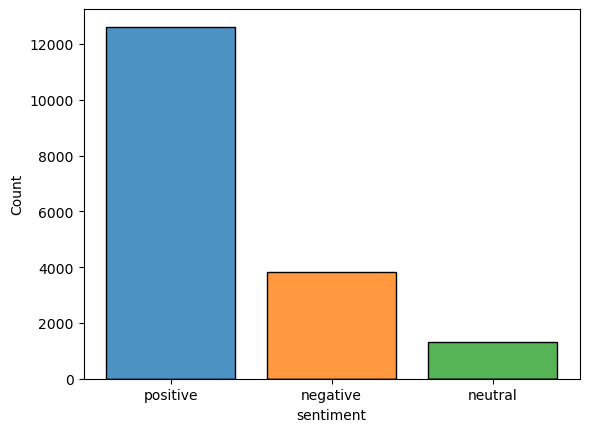

In [87]:
sns.histplot(data=ID_TWEET, x="sentiment", hue="sentiment", shrink=.8, alpha=.8, legend=False)

In [202]:
ID_TWEET_positive.clean_tweets.values

array(['put hours game last year still holds well blast playing definitely one highlights great still active sad day servers empty',
       'story great terrible',
       'year going super dynamic bc im graduating uni soon amen probably getting first job also amen im sad seonho wont much updates like wish stay healthy wanna say thankyou filling amp',
       ...,
       'really rough one mental health truly feel many good things coming year goals visions determined make reality personal growth achieve become person envisioned',
       'happy new year everyone except boy dated couple months texted midnight saying best part',
       'hi active moment wanted say happy new year account big part soo thank u everyone reads lt'],
      dtype=object)

In [89]:
ID_TWEET_negative = ID_TWEET[ID_TWEET['sentiment']=='negative']
ID_TWEET_positive = ID_TWEET[ID_TWEET['sentiment']=='positive']
ID_TWEET_neutral = ID_TWEET[ID_TWEET['sentiment']=='neutral']

In [92]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(ID_TWEET,'sentiment')

#Code for showing the percentage of the sentiment labels

,Total,Percentage
positive,12622,71.01
negative,3823,21.51
neutral,1329,7.48


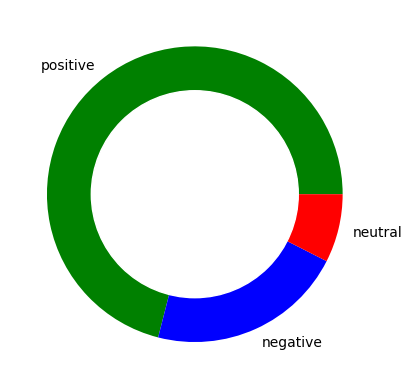

In [95]:
# create data for Pie Chart
pichart = count_values_in_column(ID_TWEET,'sentiment')
names= pichart.index
size=pichart['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [198]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open('cloud.png'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    mask = mask,
    max_words=1000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud Saved Successfully')
    path='wc.png'
    display(Image.open(path))

In [203]:
#Creating wordcloud for all tweets
#create_wordcloud(ID_TWEET['clean_tweets'].values)

In [204]:
#Creating wordcloud for positive sentiment
#create_wordcloud(ID_TWEET_positive['clean_tweets'].values)

In [205]:
#Creating wordcloud for negative sentiment
#create_wordcloud(ID_TWEET_negative['clean_tweets'].values)

In [206]:
#Creating wordcloud for neutral sentiment
#create_wordcloud(ID_TWEET_neutral['clean_tweets'].values)

In [105]:
#Calculating tweet’s length and word count
ID_TWEET['clean_tweets_length'] = ID_TWEET['clean_tweets'].astype(str).apply(len)
ID_TWEET['word_count'] =ID_TWEET['clean_tweets'].apply(lambda x: len(str(x).split()))

C:\Users\Olazaah\Anaconda3\envs\tensorlow1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Olazaah\Anaconda3\envs\tensorlow1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
ID_TWEET

,tweet_id,unclean_tweets,clean_tweets,first100charactersoftweets,polarity,subjectivity,sentiment,neg,neu,pos,compound,clean_tweets_length,word_count
0,1477985792605757447,@OctoSquid_503 I put about 50-60 hours into th...,put hours game last year still holds well blas...,put hours game last year still holds well blas...,-0.047619,0.545238,positive,0.000,0.815,0.185,0.6124,122,20
1,1477984041248989187,A story about why 2021 was great and not terri...,story great terrible,story great terrible,-0.100000,0.875000,positive,0.165,0.588,0.248,0.1803,20,3
2,1477983892665688069,The jaedo event I bought tickets for in the 2n...,jaedo event bought tickets nd quarter finally ...,jaedo event bought tickets nd quarter finally ...,-0.333333,1.000000,negative,0.230,0.556,0.214,-0.0516,114,18
3,1477981564323569664,this year is going to be super dynamic for me ...,year going super dynamic bc im graduating uni ...,year going super dynamic bc im graduating uni ...,0.130556,0.477778,positive,0.000,0.772,0.228,0.6808,178,31
4,1477981357535944707,2021 literally such a tough year 😭 none of the...,literally tough year none plan going right pre...,literally tough year none plan going right pre...,0.005423,0.684127,positive,0.000,0.843,0.157,0.3818,112,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17769,1477400508533022722,2021 really was a rough one for my mental heal...,really rough one mental health truly feel many...,really rough one mental health truly feel many...,0.200000,0.400000,positive,0.000,0.586,0.414,0.8934,157,23
17770,1477400502757257217,Happy new year to everyone except the boy I da...,happy new year everyone except boy dated coupl...,happy new year everyone except boy dated coupl...,0.645455,0.584848,positive,0.000,0.603,0.397,0.8360,87,14
17771,1477400502564499464,"2021 was so crazy I bought a car, moved out , ...",crazy bought car moved shot porn butt plug bum...,crazy bought car moved shot porn butt plug bum...,-0.600000,0.900000,negative,0.179,0.821,0.000,-0.3400,66,12
17772,1477400427259994114,"I think 2021 was a descent art year, despite n...",think descent art year despite able use tablet...,think descent art year despite able use tablet...,0.250000,0.345833,neutral,0.000,1.000,0.000,0.0000,74,12


In [110]:
round(pd.DataFrame(ID_TWEET.groupby("sentiment").clean_tweets_length.mean()),2)
### this code above gets the average length of all the negative, positive and neutral tweets

,clean_tweets_length
sentiment,
negative,104.08
neutral,84.26
positive,107.37


In [111]:
round(pd.DataFrame(ID_TWEET.groupby('sentiment').word_count.mean()),2)
### this code above gets the average number of words of all the negative, positive and neutral tweets

,word_count
sentiment,
negative,16.30
neutral,13.44
positive,16.94


In [171]:
#Removing Punctuation
def remove_punct(text):
    text = ''.join([char for char in text if char not in string.punctuation]) #remove  punctuation
    text = ''.join([char for char in text if char not in [str(x) for x in range(0,11)]])#remove numbers found in-between tweets
    #text = re.sub('[0–9]+', '', text)
    return text
ID_TWEET['non_punctuated_tweets'] = ID_TWEET['clean_tweets'].apply(lambda x: remove_punct(x))

C:\Users\Olazaah\Anaconda3\envs\tensorlow1\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [172]:
ID_TWEET

,tweet_id,unclean_tweets,clean_tweets,first100charactersoftweets,polarity,subjectivity,sentiment,neg,neu,pos,compound,clean_tweets_length,word_count,non_punctuated_tweets
0,1477985792605757447,@OctoSquid_503 I put about 50-60 hours into th...,put hours game last year still holds well blas...,put hours game last year still holds well blas...,-0.047619,0.545238,positive,0.000,0.815,0.185,0.6124,122,20,put hours game last year still holds well blas...
1,1477984041248989187,A story about why 2021 was great and not terri...,story great terrible,story great terrible,-0.100000,0.875000,positive,0.165,0.588,0.248,0.1803,20,3,story great terrible
2,1477983892665688069,The jaedo event I bought tickets for in the 2n...,jaedo event bought tickets nd quarter finally ...,jaedo event bought tickets nd quarter finally ...,-0.333333,1.000000,negative,0.230,0.556,0.214,-0.0516,114,18,jaedo event bought tickets nd quarter finally ...
3,1477981564323569664,this year is going to be super dynamic for me ...,year going super dynamic bc im graduating uni ...,year going super dynamic bc im graduating uni ...,0.130556,0.477778,positive,0.000,0.772,0.228,0.6808,178,31,year going super dynamic bc im graduating uni ...
4,1477981357535944707,2021 literally such a tough year 😭 none of the...,literally tough year none plan going right pre...,literally tough year none plan going right pre...,0.005423,0.684127,positive,0.000,0.843,0.157,0.3818,112,20,literally tough year none plan going right pre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17769,1477400508533022722,2021 really was a rough one for my mental heal...,really rough one mental health truly feel many...,really rough one mental health truly feel many...,0.200000,0.400000,positive,0.000,0.586,0.414,0.8934,157,23,really rough one mental health truly feel many...
17770,1477400502757257217,Happy new year to everyone except the boy I da...,happy new year everyone except boy dated coupl...,happy new year everyone except boy dated coupl...,0.645455,0.584848,positive,0.000,0.603,0.397,0.8360,87,14,happy new year everyone except boy dated coupl...
17771,1477400502564499464,"2021 was so crazy I bought a car, moved out , ...",crazy bought car moved shot porn butt plug bum...,crazy bought car moved shot porn butt plug bum...,-0.600000,0.900000,negative,0.179,0.821,0.000,-0.3400,66,12,crazy bought car moved shot porn butt plug bum...
17772,1477400427259994114,"I think 2021 was a descent art year, despite n...",think descent art year despite able use tablet...,think descent art year despite able use tablet...,0.250000,0.345833,neutral,0.000,1.000,0.000,0.0000,74,12,think descent art year despite able use tablet...


In [194]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
ID_TWEET['non_punctuated_tweets'] = ID_TWEET['non_punctuated_tweets'].apply(lambda x: cleaning_repeating_char(x))
ID_TWEET['non_punctuated_tweets'].tail()

C:\Users\Olazaah\Anaconda3\envs\tensorlow1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


17769    really rough one mental health truly feel many...
17770    happy new year everyone except boy dated coupl...
17771    crazy bought car moved shot porn butt plug bum...
17772    think descent art year despite able use tablet...
17773    hi active moment wanted say happy new year acc...
Name: non_punctuated_tweets, dtype: object

In [196]:
ID_TWEET.to_csv('Tweets.csv', index=False)